In [3]:
# !/usr/bin/python
# -*- coding:utf-8 -*-

import matplotlib as mpl
import matplotlib.colors
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture

from matplotlib.font_manager import FontProperties
font_set = FontProperties(fname='../fonts/simhei.ttf', size=15)
fontproperties=font_set
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [4]:
def expand(a, b, rate=0.05):
    d = (b - a) * rate
    return a - d, b + d


def accuracy_rate(y1, y2):
    acc = np.mean(y1 == y2)
    return acc if acc > 0.5 else 1 - acc


In [5]:
np.random.seed(0)
cov1 = np.diag((1, 2))
print cov1
N1 = 500
N2 = 300
N = N1 + N2
x1 = np.random.multivariate_normal(mean=(1, 2), cov=cov1, size=N1)
m = np.array(((1, 1), (1, 3)))
x1 = x1.dot(m)
x2 = np.random.multivariate_normal(mean=(-1, 10), cov=cov1, size=N2)
x = np.vstack((x1, x2))
y = np.array([0] * N1 + [1] * N2)

[[1 0]
 [0 2]]


In [6]:
types = ('spherical', 'diag', 'tied', 'full')
err = np.empty(len(types))
bic = np.empty(len(types))
for i, type in enumerate(types):
    gmm = GaussianMixture(n_components=2, covariance_type=type, random_state=0)
    gmm.fit(x)
    err[i] = 1 - accuracy_rate(gmm.predict(x), y)
    bic[i] = gmm.bic(x)
print '错误率：', err.ravel()
print 'BIC：', bic.ravel()
xpos = np.arange(4)

错误率： [ 0.385    0.315    0.3      0.00125]
BIC： [ 7990.71460065  7855.56050855  8006.49834359  6845.79374805]


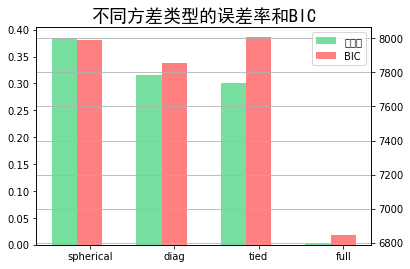

In [9]:
plt.figure(facecolor='w')
ax = plt.axes()
b1 = ax.bar(xpos - 0.3, err, width=0.3, color='#77E0A0')
b2 = ax.twinx().bar(xpos, bic, width=0.3, color='#FF8080')
plt.grid(True)
bic_min, bic_max = expand(bic.min(), bic.max())
plt.ylim((bic_min, bic_max))
plt.xticks(xpos, types)
plt.legend([b1[0], b2[0]], (u'错误率', u'BIC'))
plt.title(u'不同方差类型的误差率和BIC', fontsize=18, fontproperties=fontproperties)
plt.show()

均值 = 
[[ -0.97642254  10.06927801]
 [  2.88444448   6.69484552]]
方差 = 
[[[  0.91302546  -0.04298504]
  [ -0.04298504   1.9603531 ]]

 [[  2.87015473   6.64421303]
  [  6.64421303  18.00318872]]]


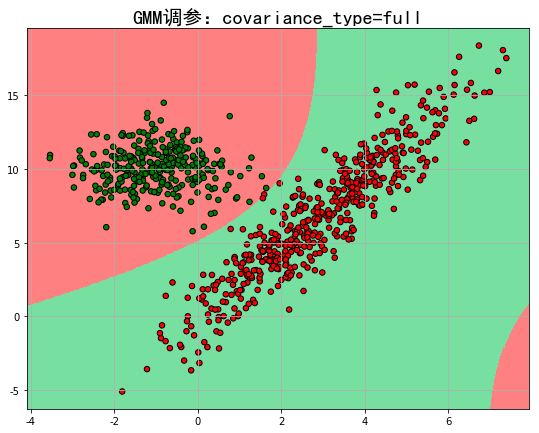

In [10]:
optimal = bic.argmin()
gmm = GaussianMixture(n_components=2, covariance_type=types[optimal], random_state=0)
gmm.fit(x)
print '均值 = \n', gmm.means_
print '方差 = \n', gmm.covariances_
y_hat = gmm.predict(x)

cm_light = mpl.colors.ListedColormap(['#FF8080', '#77E0A0'])
cm_dark = mpl.colors.ListedColormap(['r', 'g'])
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()
x1_min, x1_max = expand(x1_min, x1_max)
x2_min, x2_max = expand(x2_min, x2_max)
x1, x2 = np.mgrid[x1_min:x1_max:500j, x2_min:x2_max:500j]
grid_test = np.stack((x1.flat, x2.flat), axis=1)
grid_hat = gmm.predict(grid_test)
grid_hat = grid_hat.reshape(x1.shape)
if gmm.means_[0][0] > gmm.means_[1][0]:
    z = grid_hat == 0
    grid_hat[z] = 1
    grid_hat[~z] = 0
plt.figure(figsize=(9, 7), facecolor='w')
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)
plt.scatter(x[:, 0], x[:, 1], s=30, c=y, marker='o', cmap=cm_dark, edgecolors='k')

ax1_min, ax1_max, ax2_min, ax2_max = plt.axis()
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title(u'GMM调参：covariance_type=%s' % types[optimal], fontsize=20, fontproperties=fontproperties)
plt.grid()
plt.show()